In [1]:
import xarray as xr
import semopy as sm
from pcv.process import select_data
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pcv.process import create_xr_dataset
from pcv.models import mod_2

In [2]:
t2m_path = "/Users/anand/Documents/data/project_3_data/data/detrended_t2m.nc"
tp_path = "/Users/anand/Documents/data/project_3_data/data/detrended_tp.nc"
rad_path = "/Users/anand/Documents/data/project_3_data/data/detrended_ssrd.nc"
lai_path = "/Users/anand/Documents/data/project_3_data/data/detrended_lai.nc"
swvlall_path = "/Users/anand/Documents/data/project_3_data/data/detrended_swvlall.nc"
vpd_path = "/Users/anand/Documents/data/project_3_data/data/detrended_vpd.nc"
sd_path = "/Users/anand/Documents/data/project_3_data/data/detrended_sd.nc"

t2m_data = xr.open_dataset(t2m_path)
tp_data = xr.open_dataset(tp_path)
ssrd_data = xr.open_dataset(rad_path)
swvlall_data = xr.open_dataset(swvlall_path)
vpd_data = xr.open_dataset(vpd_path)
lai_data = xr.open_dataset(lai_path)
sd_data = xr.open_dataset(sd_path)

In [3]:
temp_winter = select_data(t2m_data,  "winter")
temp_spring = select_data(t2m_data,  "spring")
temp_summer = select_data(t2m_data,  "summer")

tp_winter = select_data(tp_data,  "winter")
tp_spring = select_data(tp_data,  "spring")
tp_summer = select_data(tp_data,  "summer")

ssrd_winter = select_data(ssrd_data,  "winter")
ssrd_spring = select_data(ssrd_data,  "spring")
ssrd_summer = select_data(ssrd_data,  "summer")

lai_winter = select_data(lai_data,  "winter")
lai_spring = select_data(lai_data,  "spring")
lai_summer = select_data(lai_data,  "summer")

swvlall_winter = select_data(swvlall_data,  "winter")
swvlall_spring = select_data(swvlall_data,  "spring")
swvlall_summer = select_data(swvlall_data,  "summer")

vpd_winter = select_data(vpd_data,  "winter")
vpd_spring = select_data(vpd_data,  "spring")
vpd_summer = select_data(vpd_data,  "summer")

In [4]:
model = sm.Model(mod_2)

xr_dataset = create_xr_dataset(model, lai_data.latitude, lai_data.longitude)


model.inspect()

22
88
4


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,lai_spring,~,tp_spring,Not estimated,-,-,-
1,lai_spring,~,ssrd_spring,Not estimated,-,-,-
2,lai_spring,~,temp_spring,Not estimated,-,-,-
3,lai_spring,~,swvlall_spring,Not estimated,-,-,-
4,lai_spring,~,lai_winter,Not estimated,-,-,-
5,swvlall_summer,~,lai_spring,Not estimated,-,-,-
6,swvlall_summer,~,ssrd_summer,Not estimated,-,-,-
7,swvlall_summer,~,temp_summer,Not estimated,-,-,-
8,swvlall_summer,~,tp_summer,Not estimated,-,-,-
9,swvlall_spring,~,lai_winter,Not estimated,-,-,-


In [5]:
xr_dataset

<xarray.Dataset>
Dimensions:                   (latitude: 200, longitude: 220)
Coordinates:
  * latitude                  (latitude) float64 74.88 74.62 ... 25.38 25.12
  * longitude                 (longitude) float64 -9.875 -9.625 ... 44.62 44.88
Data variables: (12/32)
    lai_spring~Estimate       (latitude, longitude) float64 nan nan ... nan nan
    lai_spring~Std. Err       (latitude, longitude) float64 nan nan ... nan nan
    lai_spring~z-value        (latitude, longitude) float64 nan nan ... nan nan
    lai_spring~p-value        (latitude, longitude) float64 nan nan ... nan nan
    swvlall_summer~Estimate   (latitude, longitude) float64 nan nan ... nan nan
    swvlall_summer~Std. Err   (latitude, longitude) float64 nan nan ... nan nan
    ...                        ...
    swvlall_spring~~z-value   (latitude, longitude) float64 nan nan ... nan nan
    swvlall_spring~~p-value   (latitude, longitude) float64 nan nan ... nan nan
    lai_summer~~Estimate      (latitude, longitude) float64 nan nan ... nan nan
    lai_summer~~Std. Err      (latitude, longitude) float64 nan nan ... nan nan
    lai_summer~~z-value       (latitude, longitude) float64 nan nan ... nan nan
    lai_summer~~p-value       (latitude, longitude) float64 nan nan ... nan nan

In [4]:
# model_data = xr.Dataset(
#     {
#         "chi2": (
#             ("latitude", "longitude"), np.full((200, 220), np.nan)),         
#         "lai_summer_to_lai_spring_E": (
#             ("latitude", "longitude"), np.full((200, 220), np.nan)),
#         "swvlall_summer_to_lai_spring_E": (
#             ("latitude", "longitude"), np.full((200, 220), np.nan)),
        
#     },
#     coords= {"latitude":lai_data.latitude, "longitude":lai_data.longitude}
# )



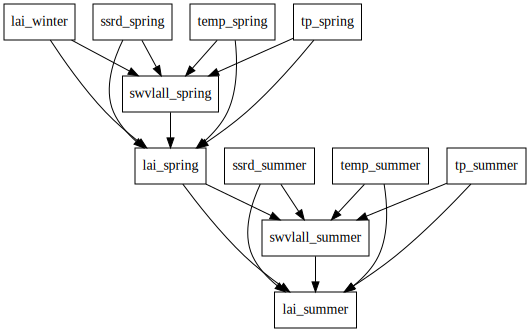

In [5]:

mod = mod_2
model = sm.Model(mod)
sm.semplot(model, f"images/sem_fit_2.png")


In [3]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,swvlall_summer,~,swvlall_spring,Not estimated,-,-,-
1,swvlall_summer,~,tp_summer,Not estimated,-,-,-
2,swvlall_summer,~,t2m_summer,Not estimated,-,-,-
3,swvlall_summer,~,lai_spring,Not estimated,-,-,-
4,lai_spring,~,swvlall_spring,Not estimated,-,-,-
5,swvlall_spring,~,swvlall_winter,Not estimated,-,-,-
6,swvlall_spring,~,tp_spring,Not estimated,-,-,-
7,swvlall_spring,~,t2m_spring,Not estimated,-,-,-
8,swvlall_winter,~,tp_spring,Not estimated,-,-,-
9,swvlall_winter,~,t2m_spring,Not estimated,-,-,-


In [7]:
model_data = xr.Dataset(
    {
        "chi2": (
            ("latitude", "longitude"), np.full((200, 220), np.nan)),         
        "lai_summer_to_lai_spring_E": (
            ("latitude", "longitude"), np.full((200, 220), np.nan)),
        "swvlall_summer_to_lai_spring_E": (
            ("latitude", "longitude"), np.full((200, 220), np.nan)),
        
    },
    coords= {"latitude":lai_data.latitude, "longitude":lai_data.longitude}
)

In [30]:


model_data_dict = dict()
for index in model.inspect().index:
    model_data_dict["".join(model.inspect().iloc[index,:3].values)] = (
            ("latitude", "longitude"), np.full((200, 220), np.nan))


model_data_test = xr.Dataset(model_data_dict)
model_data_test

model.inspect().columns[3:]

Index(['Estimate', 'Std. Err', 'z-value', 'p-value'], dtype='object')

In [6]:
for lat in range(200):
    print(lat)
    for lon in range(220):
        lai_w = lai_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
        if np.isnan(lai_w).any() == True:
            pass
        else:

            lai_sp = lai_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            lai_su = lai_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            
            temp_w = temp_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            temp_sp = temp_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            temp_su = temp_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

            tp_w = tp_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            tp_sp = tp_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            tp_su = tp_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            
            ssrd_w = ssrd_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            ssrd_sp = ssrd_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            ssrd_su = ssrd_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

            vpd_w = vpd_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            vpd_sp = vpd_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            vpd_su = vpd_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

            swvlall_w = swvlall_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            swvlall_sp = swvlall_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            swvlall_su = swvlall_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
            assert temp_w.shape == temp_sp.shape == temp_su.shape
            
            list_val = [temp_w[:-1], temp_sp[1:], temp_su[1:],
                    tp_w[:-1], tp_sp[1:], tp_su[1:], 
                    ssrd_w[:-1], ssrd_sp[1:], ssrd_su[1:], 
                    lai_w[:-1], lai_sp[1:], lai_su[1:],
                    vpd_w[:-1], vpd_sp[1:], vpd_su[1:],
                    swvlall_w[:-1], swvlall_sp[1:], swvlall_su[1:]
                    ]

            col_names = ["temp_winter", "temp_spring", "temp_summer",
                            "tp_winter", "tp_spring", "tp_summer",
                            "ssrd_winter", "ssrd_spring", "ssrd_summer",
                            "lai_winter", "lai_spring", "lai_summer", 
                            "vpd_winter", "vpd_spring", "vpd_summer",
                            "swvlall_winter", "swvlall_spring", "swvlall_summer",
                            ]    
            data = np.vstack(list_val).T

            df = pd.DataFrame(data, columns=col_names)
            df=(df-df.mean())/df.std()
            
            model = sm.Model(mod)
            model.fit(df)
            chi2 = sm.calc_stats(model)["chi2 p-value"][0]
            model_data.chi2[lat, lon] = chi2
            model_data.lai_summer_to_lai_spring_E[lat, lon] = model.inspect().iloc[11, :].Estimate
            model_data.swvlall_summer_to_lai_spring_E[lat, lon] = model.inspect().iloc[3, :].Estimate

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


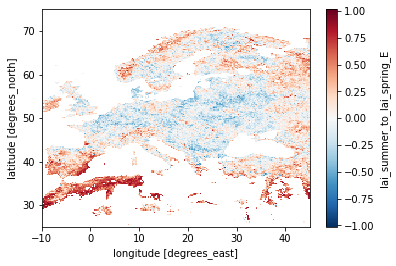

In [7]:
model_data.lai_summer_to_lai_spring_E.plot()

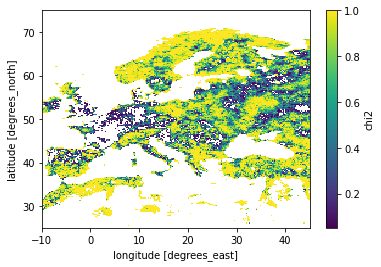

In [11]:
model_data.chi2.where(model_data.chi2>0.05).plot()

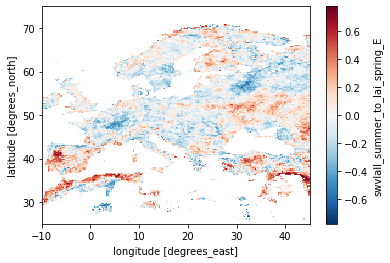

In [12]:
model_data.swvlall_summer_to_lai_spring_E.plot()

In [13]:
model_data.to_netcdf("/Users/anand/Documents/data/project_3_data/data/sem_data.nc")

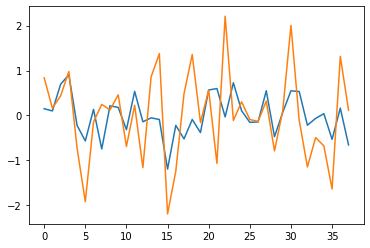

In [42]:
df_pred = df.copy()
df_pred["lai_summer"] = float('nan')

pred_lai_summer = model.predict(df_pred).lai_summer
plt.plot(pred_lai_summer.values)
plt.plot(df.lai_summer.values)

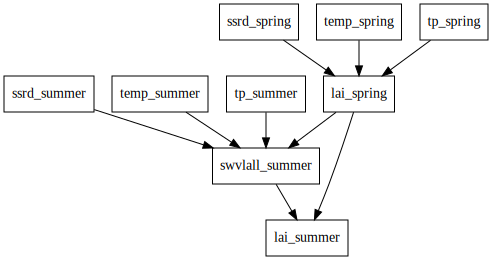

In [10]:
mod_0 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ swvlall_summer
lai_summer ~ lai_spring

"""
model = sm.Model(mod_0)
sm.semplot(model, f"images/sem_fit_general_0.png")

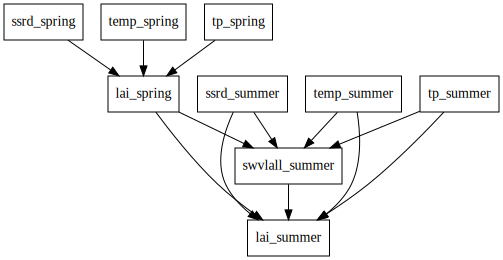

In [18]:
mod_1 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ lai_spring

"""
model = sm.Model(mod_1)
sm.semplot(model, f"images/sem_fit_general_1.png")

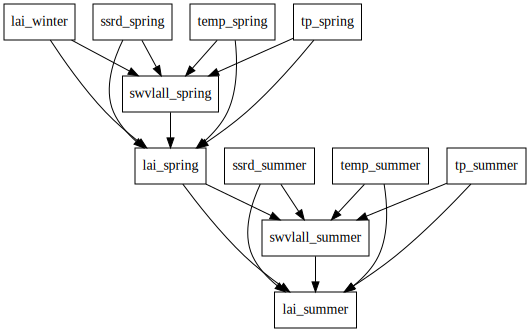

In [14]:
mod_2 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring + swvlall_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
swvlall_spring ~ lai_winter + ssrd_spring + temp_spring+ tp_spring
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ lai_spring
lai_spring ~ lai_winter

"""
model = sm.Model(mod_2)
sm.semplot(model, f"images/sem_fit_general_2.png")

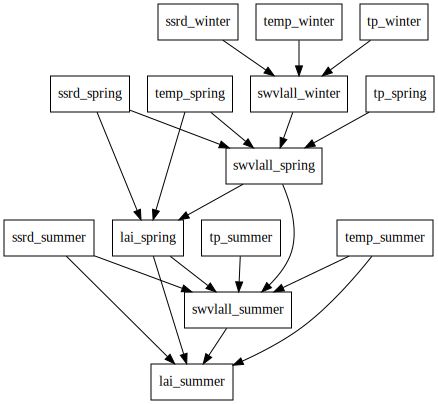

In [15]:
mod_3 = """
# measurement model

lai_spring ~  ssrd_spring + temp_spring + swvlall_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer +swvlall_spring
swvlall_spring ~  ssrd_spring + temp_spring+ tp_spring + swvlall_winter
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer
lai_summer ~ lai_spring
swvlall_winter ~ ssrd_winter + temp_winter+ tp_winter

"""
model = sm.Model(mod_3)
sm.semplot(model, f"images/sem_fit_general_3.png")

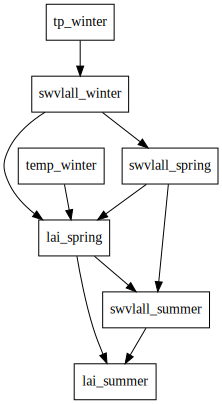

In [40]:

model = sm.Model(mod_4)
sm.semplot(model, f"images/sem_fit_general_4.png")

In [41]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,swvlall_winter,~,tp_winter,Not estimated,-,-,-
1,swvlall_spring,~,swvlall_winter,Not estimated,-,-,-
2,lai_spring,~,swvlall_spring,Not estimated,-,-,-
3,lai_spring,~,temp_winter,Not estimated,-,-,-
4,lai_spring,~,swvlall_winter,Not estimated,-,-,-
5,swvlall_summer,~,swvlall_spring,Not estimated,-,-,-
6,swvlall_summer,~,lai_spring,Not estimated,-,-,-
7,lai_summer,~,swvlall_summer,Not estimated,-,-,-
8,lai_summer,~,lai_spring,Not estimated,-,-,-
9,swvlall_winter,~~,swvlall_winter,Not estimated,-,-,-


In [10]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,lai_spring,~,tp_spring,Not estimated,-,-,-
1,lai_spring,~,ssrd_spring,Not estimated,-,-,-
2,lai_spring,~,temp_spring,Not estimated,-,-,-
3,lai_spring,~,swvlall_spring,Not estimated,-,-,-
4,lai_spring,~,lai_winter,Not estimated,-,-,-
5,swvlall_summer,~,lai_spring,Not estimated,-,-,-
6,swvlall_summer,~,ssrd_summer,Not estimated,-,-,-
7,swvlall_summer,~,temp_summer,Not estimated,-,-,-
8,swvlall_summer,~,tp_summer,Not estimated,-,-,-
9,swvlall_spring,~,lai_winter,Not estimated,-,-,-


abE
abF
cdE
cdF
